## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Train Feature Enginering and Selected Features CSV files

In [3]:
df = pd.read_csv('Train Feature Engineering.csv')
selected_features = pd.read_csv('selected_features.csv')
selected_features = selected_features['0'].tolist()

## Define the X, Y and split it into Training and Test dataset

In [4]:
y = df['satisfaction']
X = df[selected_features]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.2)

## Model Comparassion

###### Model selection with metrics, the metrics that I use is accuracy and precission in model selection. Precission is choose cause I want to minimize the False Positive (not satisfied data classify as satisfied) to get the worst case scenario, so the Airline can do maximum improve in the service

In [6]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import accuracy_score, precision_score
    
    accuracy_result = []
    precission_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precission = precision_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)       
        accuracy_result.append(accuracy)
        precission_result.append(precission)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(accuracy_result)
    ax1.set_ylabel('accuracy_score')

    ax2.plot(str_models,precission_result)
    ax2.set_ylabel('precission_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'accuracy':accuracy_result, 'precission':precission_result}) 

In [7]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


,models,accuracy,precission
0,LogisticRegression(),0.885087,0.869842
1,RidgeClassifier(alpha=0.005),0.880083,0.860570
2,LinearSVC(),0.884991,0.870149
3,SVC(),0.943843,0.958689
4,KNeighborsClassifier(),0.931187,0.950513
5,RadiusNeighborsClassifier(),0.903662,0.929150
6,DecisionTreeClassifier(),0.937587,0.923806
7,"(DecisionTreeClassifier(max_features='auto', r...",0.957221,0.969836
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.909148,0.901179
9,MLPClassifier(),0.945335,0.951157


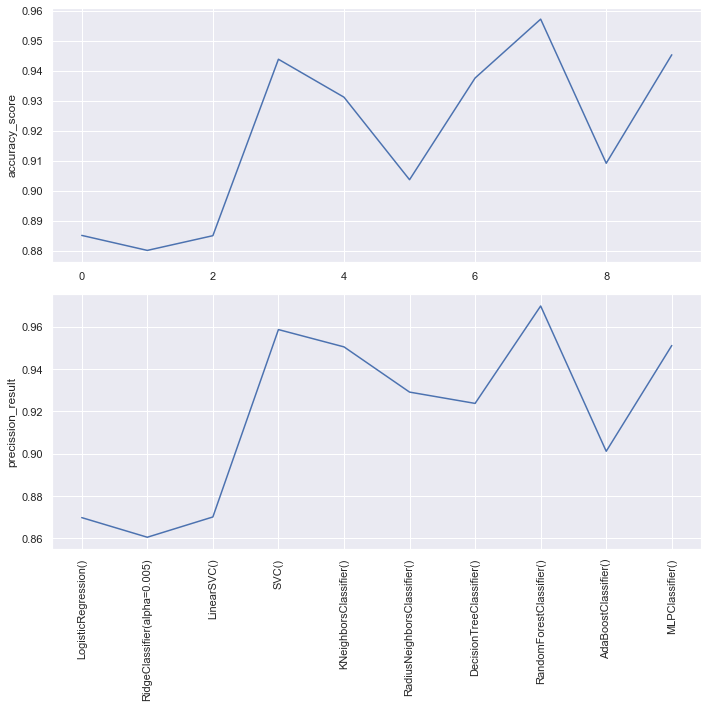

In [16]:
models = [LogisticRegression(), RidgeClassifier(alpha=0.005), LinearSVC(), SVC(), KNeighborsClassifier(),
          RadiusNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), MLPClassifier()]

model_selection(X_train, y_train, X_test, y_test, models)

#### Best Classsifier Model

In [17]:
rf = RandomForestClassifier()
svc = SVC()

## Cross Validation for the best model in model comparasion

In [18]:
def acc_CV(model, X, y):
    from sklearn.model_selection import cross_val_score

    accuracies = cross_val_score(estimator = model, X= X, y=y,  cv=10)
    accuracies.mean()
    accuracies.std()
    print('akurasi  {:.2f}% +/- {:.2f}%' .format(accuracies.mean()*100, accuracies.std()*100))

In [19]:
acc_CV(rf, X_train, y_train)

akurasi  95.56% +/- 0.19%


In [20]:
acc_CV(svc, X_train, y_train)

akurasi  94.32% +/- 0.21%


## Hyperparameter Tuning in best model

### Random Forest Classifier

####  Tuning using GridSearchCV per parameters

In [52]:
def tuning_param(X, y, model, parameters):
    
    from sklearn.model_selection import GridSearchCV   
        
    scores = []
   
    fig, axs = plt.subplots(len(parameters))
    k = 0   
    for parameter in parameters:
        
        clf = GridSearchCV(estimator = model, param_grid = parameter, cv=3, scoring='precision', n_jobs=-1)
        clf.fit(X, y)
        

        for name_param, val_param in parameter.items():
            
            grid_mean_scores = clf.cv_results_['mean_test_score']

            if len(parameters) == 1:
               axs.plot(val_param, grid_mean_scores)
               axs.set_xlabel(name_param)
               axs.set_ylabel('Precision') 
            
            else:
                axs[k].plot(val_param, grid_mean_scores)
                axs[k].set_xlabel(name_param)
                axs[k].set_ylabel('Precision')
                
                k+=1
            
            
        scores.append({'parameter':name_param,
                       'best_Precision':clf.best_score_,
                       'best_value':clf.best_params_})
            
    plt.tight_layout()       
    return pd.DataFrame(scores, columns=['parameter', 'best_Precision', 'best_value'])

,parameter,best_Precision,best_value
0,n_estimators,0.967289,{'n_estimators': 300}


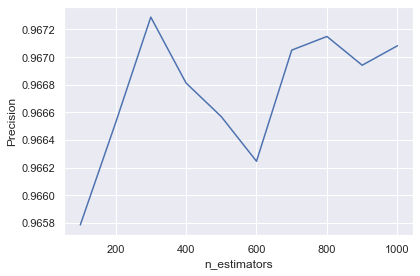

In [53]:
tuning_param(X_train, y_train, rf, [{'n_estimators': np.arange(100, 1010, 100)}])

,parameter,best_Precision,best_value
0,min_samples_split,0.967185,{'min_samples_split': 2}


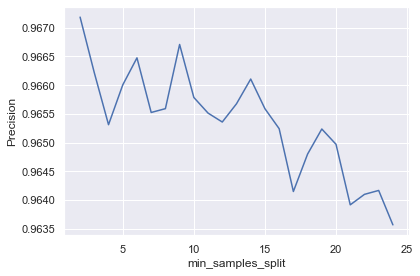

In [54]:
tuning_param(X_train, y_train, rf, [{'min_samples_split':np.arange(1, 25, 1)}])

,parameter,best_Precision,best_value
0,min_samples_leaf,0.966416,{'min_samples_leaf': 1}


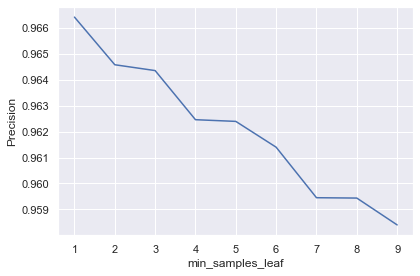

In [55]:
tuning_param(X_train, y_train, rf, [{'min_samples_leaf':np.arange(1, 10, 1)}])

,parameter,best_Precision,best_value
0,max_depth,0.966924,{'max_depth': 19}


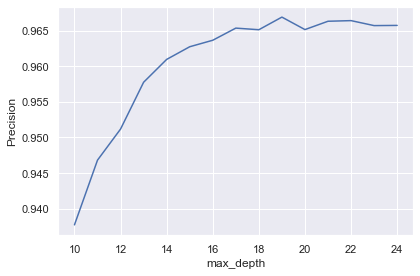

In [56]:
tuning_param(X_train, y_train, rf, [{'max_depth':np.arange(10,25, 1)}])

### Hyperparameter using RandomizedsearchCV

In [61]:
def model_randomCV(X, y, model, parameters):
    
    from sklearn.model_selection import RandomizedSearchCV
    
    randCV = RandomizedSearchCV(estimator=model, scoring='precision', param_distributions=parameters, n_jobs=-1, cv=3)
    
    randCV.fit(X, y)
   
    print('best_parameters: ' + str(randCV.best_params_))
    print('best_score: ' + str(randCV.best_score_))
    print('best_estimator: ' + str(randCV.best_estimator_))    
    
    return pd.DataFrame(randCV.cv_results_).sort_values(by='rank_test_score')

In [62]:
parameters = {'n_estimators': np.arange(290, 310, 5), 'max_features':['auto', 'sqrt', 'log2'], 'max_depth':np.arange(18,23, 1), 
             'min_samples_split':np.arange(3, 8, 1), 'criterion':['gini', 'entropy']}

model_randomCV(X_train, y_train, rf, parameters)

best_parameters: {'n_estimators': 295, 'min_samples_split': 3, 'max_features': 'sqrt', 'max_depth': 19, 'criterion': 'entropy'}
best_score: 0.9683368829908368
best_estimator: RandomForestClassifier(criterion='entropy', max_depth=19, max_features='sqrt',
                       min_samples_split=3, n_estimators=295)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,59.567000,0.335144,4.135335,0.173696,295,3,sqrt,19,entropy,"{'n_estimators': 295, 'min_samples_split': 3, ...",0.968631,0.966221,0.970158,0.968337,0.001621,1
1,64.507274,9.151691,4.565498,0.151912,295,3,sqrt,22,entropy,"{'n_estimators': 295, 'min_samples_split': 3, ...",0.967859,0.966724,0.970212,0.968265,0.001452,2
2,58.982875,1.297378,4.418999,0.130099,305,6,auto,20,entropy,"{'n_estimators': 305, 'min_samples_split': 6, ...",0.968055,0.965808,0.969705,0.967856,0.001597,3
3,56.130666,0.364109,4.193668,0.044977,295,5,auto,21,gini,"{'n_estimators': 295, 'min_samples_split': 5, ...",0.966491,0.965238,0.969084,0.966938,0.001601,4
6,55.918670,0.026234,4.014667,0.101465,290,4,sqrt,18,gini,"{'n_estimators': 290, 'min_samples_split': 4, ...",0.966134,0.964906,0.968986,0.966675,0.001709,5
0,76.895296,0.362028,5.184429,0.052139,305,7,sqrt,21,gini,"{'n_estimators': 305, 'min_samples_split': 7, ...",0.965714,0.965339,0.968075,0.966376,0.001211,6
8,54.932003,0.028894,3.882000,0.067363,290,6,log2,19,gini,"{'n_estimators': 290, 'min_samples_split': 6, ...",0.966549,0.964918,0.967616,0.966361,0.001109,7
4,59.084667,0.417676,4.108669,0.053326,305,6,sqrt,19,gini,"{'n_estimators': 305, 'min_samples_split': 6, ...",0.966808,0.963341,0.968815,0.966321,0.002261,8
7,57.538665,0.334213,4.211337,0.010875,300,4,auto,20,gini,"{'n_estimators': 300, 'min_samples_split': 4, ...",0.965887,0.964387,0.968601,0.966291,0.001744,9
9,50.524995,3.846431,3.302029,0.423798,290,4,log2,21,gini,"{'n_estimators': 290, 'min_samples_split': 4, ...",0.965708,0.964918,0.967725,0.966117,0.001182,10


In [91]:
def fit_check(model, kfolds):
    
    from sklearn.model_selection import KFold
    from sklearn.metrics import precision_score
    
    kf = KFold(n_splits=kfolds)
    list_training_error = []
    list_testing_error = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_train_data_pred = model.predict(X_train)
        y_test_data_pred = model.predict(X_test)
        fold_training_error = precision_score(y_train, y_train_data_pred)
        fold_testing_error = precision_score(y_test, y_test_data_pred)
        list_training_error.append(fold_training_error)
        list_testing_error.append(fold_testing_error)
    
    figsize=(5,5)
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-', label = 'training')
    plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-', label = 'testing')
    plt.xlabel('number of fold')
    plt.ylabel('Precision')
    plt.title('Precision across folds')
    plt.legend()
    plt.tight_layout()
    plt.show()

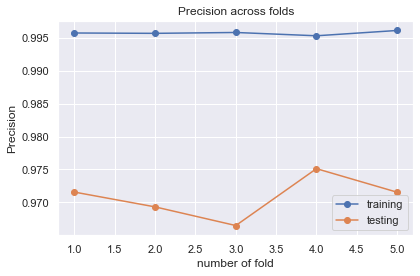

In [92]:
rf_best = RandomForestClassifier(criterion='entropy', max_depth=19, max_features='sqrt', min_samples_split=3, n_estimators=295)

fit_check(rf_best, 5)

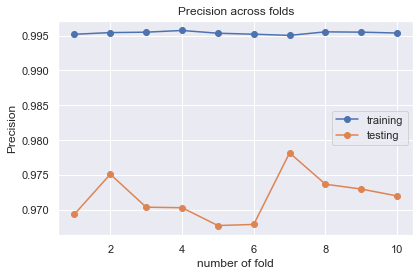

In [102]:
rf_best = RandomForestClassifier(criterion='entropy', max_depth=19, max_features='sqrt', min_samples_split=3, n_estimators=295)

fit_check(rf_best, 10)

In [107]:
def ROC_AUC_test(X_train, y_train, X_test, y_test, model):
    from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    thresholds = 0.5
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_test)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_test))